<a href="https://colab.research.google.com/github/ALDO12062004/EDP1/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Utilizando las librerías sympy y scipy de pyhton y realizar lo siguiente

#a) Gráficar en un solo panel los polinomios de Legendre, $P_n (x)$ para n$ = 0 ... 5$

Importamos las librerias

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import legendre, symbols
from sympy.plotting import plot

Definimos la función $f(x)=x$

In [20]:


# Definir el símbolo x
x = symbols('x')

Creamos la gráfica en un solo panel

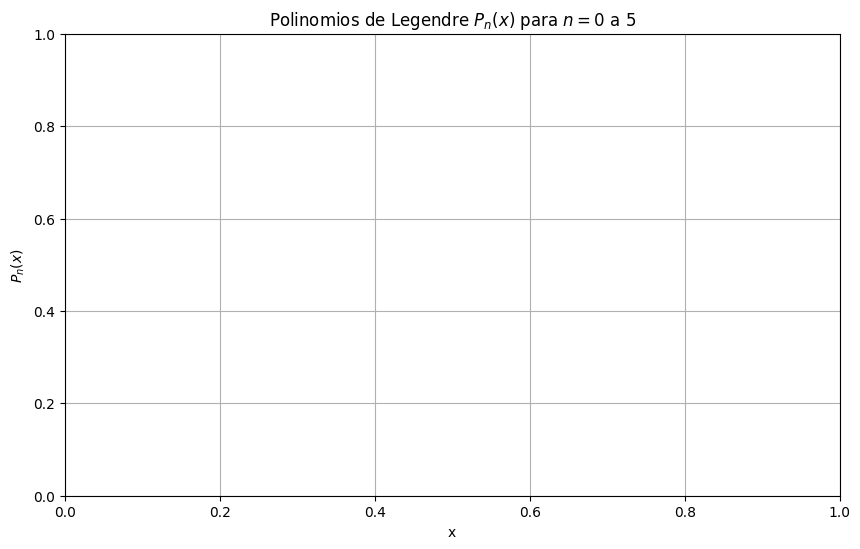

In [21]:
# Crear una figura con un solo panel
plt.figure(figsize=(10, 6))
plt.title('Polinomios de Legendre $P_n(x)$ para $n=0$ a $5$')
plt.xlabel('x')
plt.ylabel('$P_n(x)$')
plt.grid(True)

Creamos la gráfica para los distintos valores de n

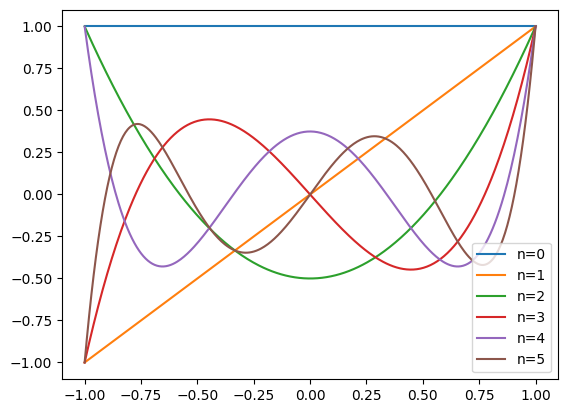

In [24]:
# Graficar cada polinomio de Legendre para n=0 a 5
for n in range(6):
    Pn = legendre(n, x)
    # Convertir la expresión simbólica a una función numérica para graficar
    Pn_func = lambda x_val: Pn.subs(x, x_val)
    x_vals = np.linspace(-1, 1, 400)
    y_vals = [Pn_func(val) for val in x_vals]
    plt.plot(x_vals, y_vals, label=f'n={n}')
plt.legend(loc='best')
plt.show()


#b) Mostrar gráficamente que se satisface la relación (hágalo para $n=3$)
$$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$$

Verificamos los distintos valores de n

In [ ]:
# Configuración del gráfico
plt.figure(figsize=(10, 6))
plt.title('Verificación de la relación para polinomios de Legendre (n=3)')
plt.xlabel('x')
plt.grid(True)

Definimos el valor de $n$ (en este caso $n=3$

In [25]:
# Definir n=3
n = 3

Calculamos los polinomios que vamos a necesitar

In [26]:
# Calcular los polinomios necesarios
P3 = legendre(n, x)
P4 = legendre(n+1, x)
dP3 = diff(P3, x)  # Derivada de P3

In [ ]:
# Lado izquierdo de la ecuación: (1-x²)P3'(x)
lhs = (1 - x**2)*dP3

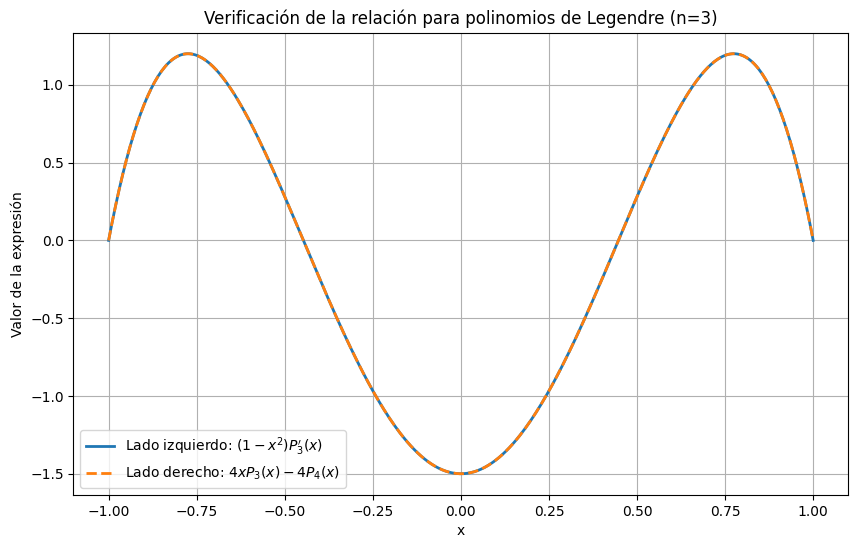

In [25]:


# Lado derecho de la ecuación: (n+1)xP3(x) - (n+1)P4(x)
rhs = (n+1)*x*P3 - (n+1)*P4

# Convertir a funciones numéricas
lhs_func = lambda x_val: lhs.subs(x, x_val)
rhs_func = lambda x_val: rhs.subs(x, x_val)

# Evaluar en el intervalo [-1, 1]
x_vals = np.linspace(-1, 1, 400)
lhs_vals = [lhs_func(val) for val in x_vals]
rhs_vals = [rhs_func(val) for val in x_vals]

# Graficar ambos lados
plt.plot(x_vals, lhs_vals, label='Lado izquierdo: $(1-x^2)P_3\'(x)$', linewidth=2)
plt.plot(x_vals, rhs_vals, '--', label='Lado derecho: $4xP_3(x) - 4P_4(x)$', linewidth=2)

plt.legend(loc='best')
plt.ylabel('Valor de la expresión')
plt.show()

#c) Mostrar algebraicamente que se satisface la relación (hágalo para $n=3$)
$$(1-x^2)P'_n(x)=(n+1)xP_n(x)-(n+1)P_{n+1}(x)$$

In [16]:
from sympy import legendre, symbols, diff, simplify, Eq

x = symbols('x')
n = 3

# Definir los polinomios
P3 = legendre(n, x)
P4 = legendre(n+1, x)
dP3 = diff(P3, x)

# Lados de la ecuación
lhs = (1 - x**2)*dP3
rhs = (n+1)*x*P3 - (n+1)*P4

# Verificación
verification = simplify(lhs - rhs) == 0
print(f"¿La relación se cumple para n=3? {verification}")

¿La relación se cumple para n=3? True


#d) Mostrar algebraicamente que se satisface la relación (hagalo para $n=3$)
$$(n+1)P_{n+1}(x)-(2n+1)xP_n(x)+nP_{n+1}(x)=0, n=1,2, ...$$

In [13]:
from sympy import legendre, symbols, simplify

x = symbols('x')
n = 3

# Definir los polinomios
P_prev = legendre(n-1, x)  # P₂(x)
P_current = legendre(n, x)  # P₃(x)
P_next = legendre(n+1, x)   # P₄(x)

# Verificar la relación de recurrencia
relacion = (n+1)*P_next - (2*n+1)*x*P_current + n*P_prev
verificacion = simplify(relacion) == 0

print(f"¿Se cumple la relación de recurrencia para n=3? {verificacion}")

¿Se cumple la relación de recurrencia para n=3? True


#e) Muestre que se cumple la fórmula de Rodrigues, ejemplificando para n=0,1,...,5
$$P_n(x)= \frac{1}{2^nn!} \frac{d^n}{dx^n}(x^2-1)^n , n=0,1,2...$$

In [14]:
from sympy import symbols, diff, factorial, simplify, expand
from sympy import legendre as P  # Polinomio de Legendre estándar

x = symbols('x')

def rodrigues(n):
    """Calcula el polinomio de Legendre usando la fórmula de Rodrigues"""
    return (1/(2**n * factorial(n))) * diff((x**2 - 1)**n, x, n)

# Verificación para n = 0 a 5
for n in range(6):
    P_rodrigues = rodrigues(n)
    P_standard = P(n, x)

    # Simplificamos y expandimos para comparar
    P_rodrigues_simplified = expand(simplify(P_rodrigues))
    P_standard_simplified = expand(simplify(P_standard))

    print(f"\nn = {n}")
    print(f"Fórmula de Rodrigues: {P_rodrigues_simplified}")
    print(f"Polinomio estándar:   {P_standard_simplified}")
    print(f"¿Coinciden? {P_rodrigues_simplified == P_standard_simplified}")


n = 0
Fórmula de Rodrigues: 1
Polinomio estándar:   1
¿Coinciden? True

n = 1
Fórmula de Rodrigues: x
Polinomio estándar:   x
¿Coinciden? True

n = 2
Fórmula de Rodrigues: 3*x**2/2 - 1/2
Polinomio estándar:   3*x**2/2 - 1/2
¿Coinciden? True

n = 3
Fórmula de Rodrigues: 5*x**3/2 - 3*x/2
Polinomio estándar:   5*x**3/2 - 3*x/2
¿Coinciden? True

n = 4
Fórmula de Rodrigues: 35*x**4/8 - 15*x**2/4 + 3/8
Polinomio estándar:   35*x**4/8 - 15*x**2/4 + 3/8
¿Coinciden? True

n = 5
Fórmula de Rodrigues: 63*x**5/8 - 35*x**3/4 + 15*x/8
Polinomio estándar:   63*x**5/8 - 35*x**3/4 + 15*x/8
¿Coinciden? True
